In [2]:
import numpy as np
import qutip
import matplotlib.pyplot as plt

## N = 1

In [3]:
def get_h_effective(omegaS, gamma):
    HS = omegaS * qutip.sigmax()
    HM = -1j * gamma * (qutip.qeye(2) - qutip.sigmaz()) / 2 / 2

    return HS + HM

In [4]:
omegaS = 1
LMBD = 10
dlmbd = .01
lmbd_list = np.arange(0, LMBD + dlmbd, dlmbd)


H_eff_list = []
for lmbd in lmbd_list:
    gamma = 4 * omegaS * lmbd
    H_eff_list.append(get_h_effective(omegaS, gamma))

In [5]:
eigvals = np.empty( (len(lmbd_list), 2) , dtype=np.complex128)
for i, H in enumerate(H_eff_list):
    eigvals[i] = np.linalg.eigvals(H.full())

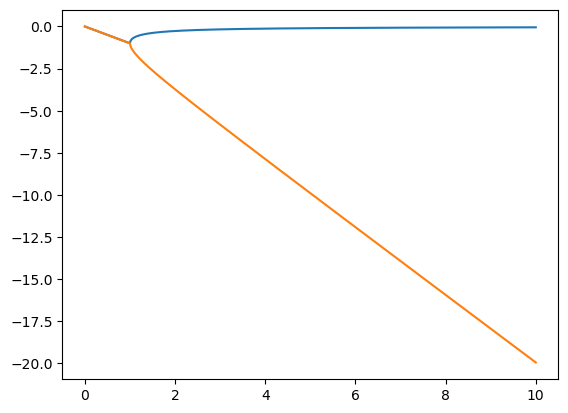

In [6]:
plt.figure()

# plt.loglog(lmbd_list, -eigvals.imag)
plt.plot(lmbd_list, eigvals.imag)

# N = 2

In [7]:
omegaS = 1
LMBD = 10
dlmbd = .2
lmbd_1_list = np.arange(0, LMBD + dlmbd, dlmbd)
lmbd_2_list = np.arange(0, LMBD + dlmbd, dlmbd)

In [8]:
def get_h_effective_2(omegaS, gamma_2, gamma_1):
    Ns = 2 # Legacy of copy/pasted code.
    HS = omegaS * qutip.tensor([qutip.sigmax()] + (Ns-1)*[qutip.qeye(2)])
    for i in range(1, Ns):
        padding_l = i * [qutip.qeye(2)]
        padding_r = (Ns-i-1) * [qutip.qeye(2)]
        HS += omegaS * qutip.tensor(padding_l + [qutip.sigmax()] + padding_r)

    I2 = qutip.qeye(2)
    spin1 = qutip.basis(2, 1)
    E1_1 = (I2 - qutip.sigmaz()) / 2
    HM_1_l = -1j * gamma_1 *  qutip.tensor(E1_1, I2) / 2
    HM_1_r = -1j * gamma_1 *  qutip.tensor(I2, E1_1) / 2
    HM_2 = -1j * gamma_2 * qutip.tensor(Ns * [spin1]) * qutip.tensor(Ns * [spin1]).dag() / 2
    
    return HS + HM_2 + HM_1_l + HM_1_r

In [9]:
H_eff_2_list = []

for lmbd_2 in lmbd_2_list:
    gamma_2 = 4 * omegaS * lmbd_2
    l = []
    for lmbd_1 in lmbd_1_list:
        gamma_1 = 4 * omegaS * lmbd_1
        l.append(get_h_effective_2(omegaS, gamma_2, gamma_1))
    H_eff_2_list.append(l)

In [10]:
eigvals_2 = np.empty( (len(lmbd_2_list), len(lmbd_1_list), 4) , dtype=np.complex128)
eigenve_2 = []
for i, lmbd_2 in enumerate(lmbd_2_list):
    eive = []
    for j, lmbd_1 in enumerate(lmbd_1_list):
        eigvals_2[i, j] = H_eff_2_list[i][j].eigenenergies()
        eive.append(H_eff_2_list[i][j].eigenstates())
    eigenve_2.append(eive)
        

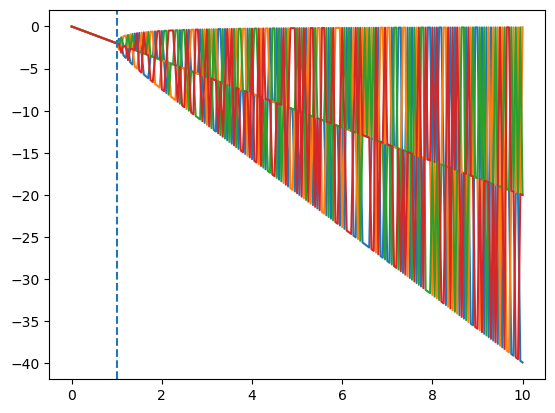

In [11]:
plt.figure()

plt.plot(lmbd_1_list, eigvals_2[0].imag)

plt.axvline(1, ls='--')

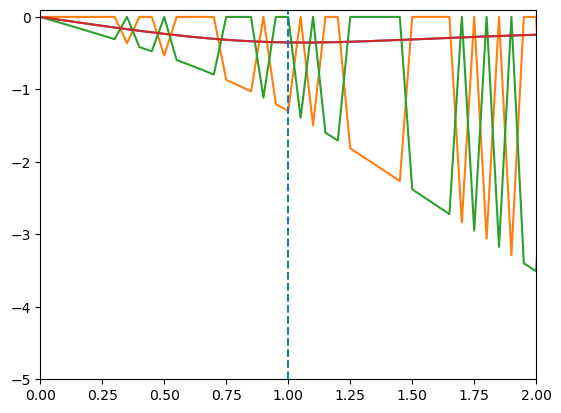

In [12]:
plt.figure()

plt.plot(lmbd_2_list, eigvals_2[:,0].imag)
plt.xlim( (0, 2) )
plt.ylim( (-5, .1) )
plt.axvline(1, ls='--')

In [13]:
evals = []
evecs = []
for i, lmbd_2 in enumerate(lmbd_2_list):
    evals.append(H_eff_2_list[10][i].eigenenergies().imag)
    evecs.append(H_eff_2_list[10][i].eigenstates())

(-3.0, 0.1)

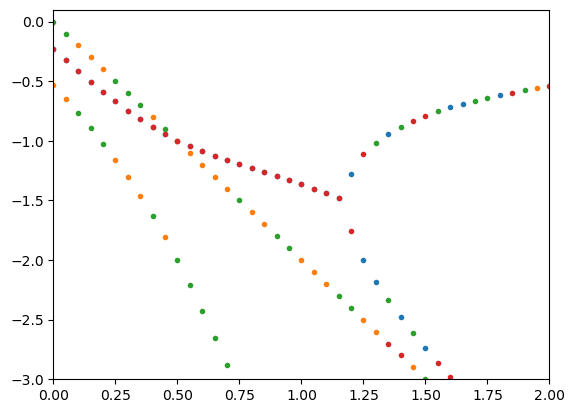

In [14]:
plt.figure()
plt.plot(lmbd_2_list, evals, ".")
plt.xlim( (0, 2) )
plt.ylim ( (-3, .1) )

In [15]:
evecs[20]

(array([-6.91601230e-01-1.36523458j,  0.00000000e+00-2.j        ,
         2.11643618e-16-4.26953084j,  6.91601230e-01-1.36523458j]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.65341647+0.j        ]
         [-0.22595182-0.44603338j]
         [-0.22595182-0.44603338j]
         [-0.21402135+0.16505083j]]                                        ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.        ]
         [-0.70710678]
         [ 0.70710678]
         [ 0.        ]]                                                    ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[-0.15028253+0.j        ]
         [ 0.        +0.32081795j]
         [ 0.        +0.32081795j]
         [ 0.87838878+0.j        ]]                                        ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), typ

In [16]:
lmbd_2_list[20]

1.0

In [17]:
evecs[20][1][0].ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.67695308+0.j         -0.17290031+0.42419976j]
 [-0.17290031-0.42419976j  0.32304692+0.j        ]]

In [18]:
evecs[20][1][3].ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.67695308+0.j         0.17290031+0.42419976j]
 [0.17290031-0.42419976j 0.32304692+0.j        ]]

In [19]:
def state_to_theta(rho):
    y = 2 * rho[1, 0].imag
    z = (rho[0, 0] - rho[1, 1]).real
    theta = np.arctan2(y, z)
    
    return theta

In [20]:
theta1 = state_to_theta(evecs[20][1][0].ptrace(0))

In [21]:
theta2 = state_to_theta(evecs[20][1][3].ptrace(0))

In [22]:
theta1

-1.1755971485896208

In [23]:
theta2

-1.1755971485896213

In [59]:
H_eff_2 = get_h_effective_2(1, 4*3, 0)

In [60]:
eigens = H_eff_2.eigenstates()

In [61]:
e0 = eigens[1][0]
e1 = eigens[1][-1]

In [62]:
eigens

(array([-1.44555594e+00-0.16609415j,  0.00000000e+00+0.j        ,
         5.14447302e-17-5.6678117j ,  1.44555594e+00-0.16609415j]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.6872537 +0.j        ]
         [-0.49673183-0.05707441j]
         [-0.49673183-0.05707441j]
         [ 0.02132023+0.1650085j ]]                                        ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.        ]
         [ 0.70710678]
         [-0.70710678]
         [ 0.        ]]                                                    ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[-0.05696407+0.j        ]
         [ 0.        +0.16143081j]
         [ 0.        +0.16143081j]
         [ 0.9719235 +0.j        ]]                                        ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), typ

In [63]:
e0

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.6872537 +0.j        ]
 [-0.49673183-0.05707441j]
 [-0.49673183-0.05707441j]
 [ 0.02132023+0.1650085j ]]

In [64]:
e1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.6872537 +0.j        ]
 [0.49673183-0.05707441j]
 [0.49673183-0.05707441j]
 [0.02132023-0.1650085j ]]

In [65]:
dtheta = np.pi/49
thetas = np.arange(0, np.pi+dtheta, dtheta)
dphi = 2*np.pi/49
phis = np.arange(0, 2*np.pi+dtheta, dphi)

In [66]:
sub_p_space = []
for t in thetas:
    for p in phis:
        state = np.cos(t/2)*e0 + np.exp(1j*p)*np.sin(p/2)*e1
        sub_p_space.append(state.ptrace(0))

In [67]:
def state_to_polar(rho):
    y = 2 * rho[1, 0].imag
    z = (rho[0, 0] - rho[1, 1]).real
    r = np.sqrt(y**2 + z**2)
    theta = np.arctan2(y, z)

    return r, theta

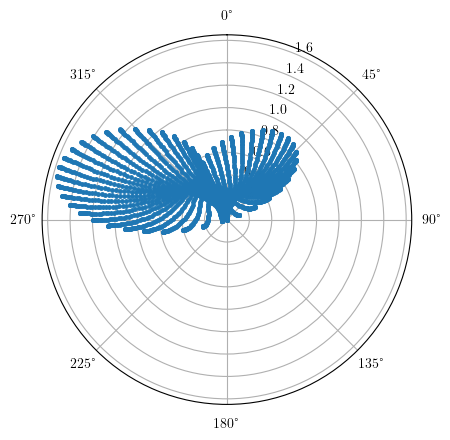

In [68]:
plt.style.use(["../config/stylelib/thesis.mplstyle"])

r_all = np.empty(len(sub_p_space))
theta_all = np.empty(len(sub_p_space))

for i, pstate in enumerate(sub_p_space):
    r_all[i], theta_all[i] = state_to_polar(pstate)

plt.figure()

plt.polar(theta_all, r_all, ".")

plt.gca().set_theta_direction(-1)
plt.gca().set_theta_zero_location('N')